Adaptação da tese "Analytic Signal Processing for Financial Time Series" do autor Thuy Trang Nguyen, originalmente implementada em R

## Exemplo 5.0.1.

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

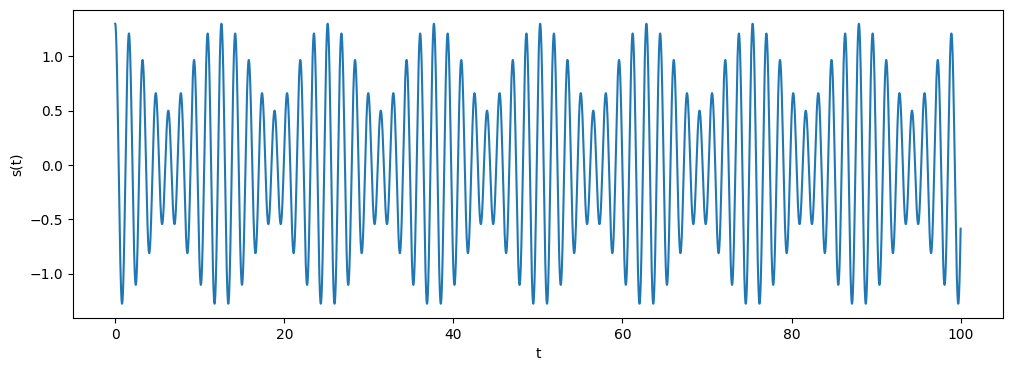

In [72]:
#Soma de cossenos
t = np.linspace(0,100,10000)
s = 0.4*np.cos(3.5*t) + 0.9*np.cos(4*t)

plt.figure(figsize=(12, 4))
plt.xlabel('t')
plt.ylabel('s(t)')
plt.plot(t, s)
plt.show()

### Implementação da FFT (Fast Fourier Transform)

In [73]:
z = np.fft.fft(s)
z[0] = 0     #Geralmente, o primeiro elemento de uma transformada de Fourier representa a componente de frequência zero.
z[5000:10000] = np.zeros(5000)     #Isso pode ser visto como uma maneira de remover ou atenuar as componentes de frequência correspondentes a esses índices. Em muitos casos, isso é feito para remover ruídos ou frequências indesejadas.
w = np.fft.ifft(z) / np.size(t)     #transformada inversa

amp = 2*np.abs(w)    #amp = np.sqrt((np.real(w)**2) + (np.imag(w)**2))

fase = np.arctan2(np.imag(w),np.real(w))

fase

array([-1.148579  , -0.90407823, -0.89093564, ..., -1.91506314,
       -1.90033627, -1.76474287])

In [74]:
sinal_hilbert = hilbert(s)
fase_hilbert = np.angle(sinal_hilbert)
   #A transformada de Hilbert tem o efeito de transformar o sinal em um deslocamento de fase de +/- 90 graus de todos os seus componentes. Como resultado, realizar a transformada de Hilbert no sinal apenas altera sua fase, enquanto a amplitude e a frequência permanecem inalteradas.

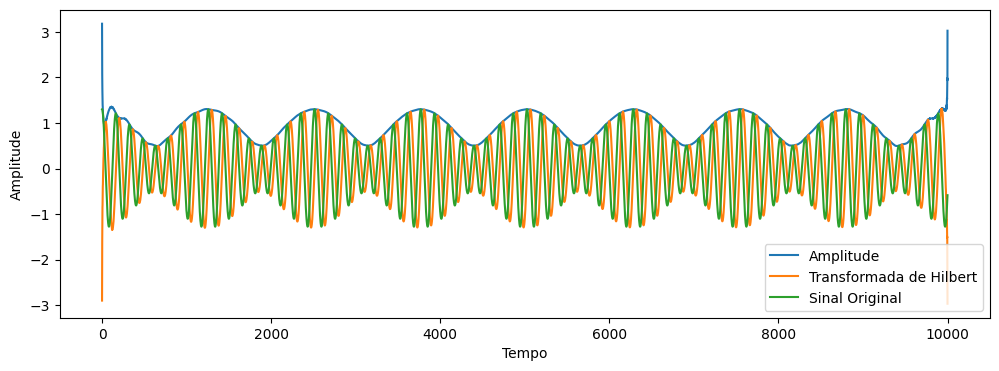

In [75]:
plt.figure(figsize=(12,4))
plt.ylabel('Amplitude')
plt.xlabel('Tempo')
plt.plot(10000*amp, label='Amplitude')
plt.plot(np.imag(sinal_hilbert), label='Transformada de Hilbert')
plt.plot(s, label='Sinal Original')
plt.legend(loc='lower right')
plt.show()

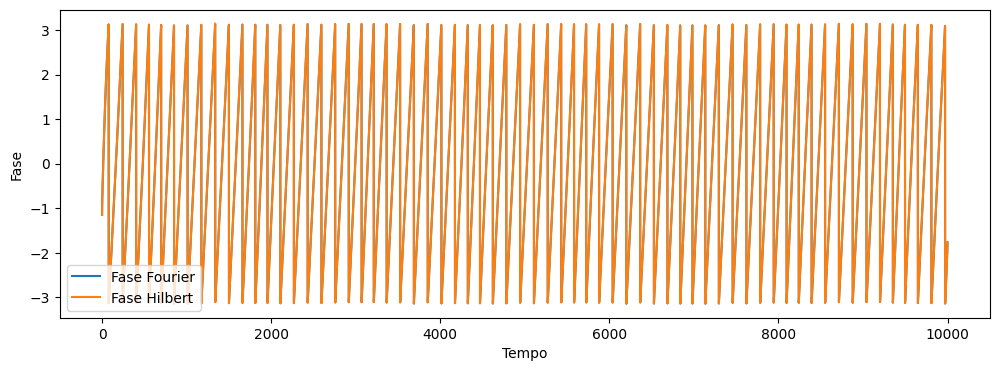

In [76]:
plt.figure(figsize=(12,4))
plt.ylabel('Fase')
plt.xlabel('Tempo')
plt.plot(fase, label='Fase Fourier')
plt.plot(fase_hilbert, label='Fase Hilbert')
plt.legend()
plt.show()

In [77]:
fase

array([-1.148579  , -0.90407823, -0.89093564, ..., -1.91506314,
       -1.90033627, -1.76474287])

In [78]:
fase_hilbert   #se sobrepoem no gráfico mas há uma leve diferença nos valores de fase
#isso deve-se ao fato do sinal não apresentar componentes complexas de amplitude e frequência, sendo estacionário

array([-1.14940585, -0.90522408, -0.89202087, ..., -1.91651817,
       -1.90174262, -1.76573743])

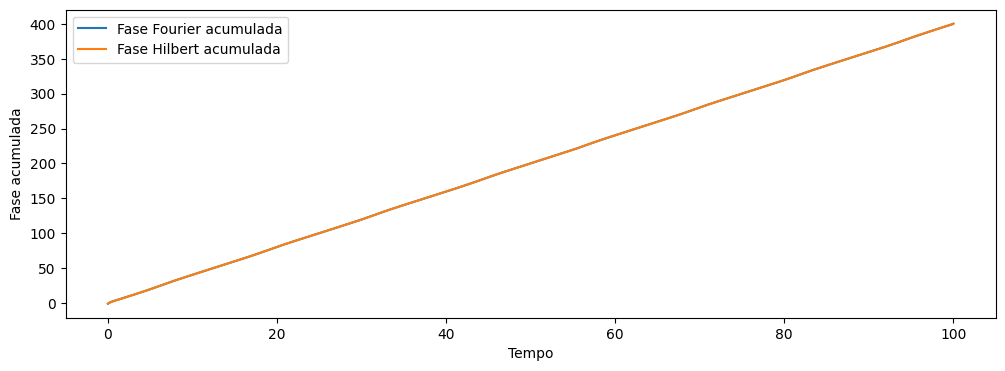

In [79]:
unwrapped_phase = np.unwrap(fase)
unwrapped_phase_hilbert = np.unwrap(fase_hilbert)

plt.figure(figsize=(12,4))
plt.ylabel('Fase acumulada')
plt.xlabel('Tempo')
plt.plot(t, unwrapped_phase, label='Fase Fourier acumulada')
plt.plot(t, unwrapped_phase_hilbert, label='Fase Hilbert acumulada')
plt.legend()
plt.show()   

In [80]:
unwrapped_phase_hilbert

array([ -1.14940585,  -0.90522408,  -0.89202087, ..., 400.20734149,
       400.22211704, 400.35812223])

In [81]:
unwrapped_phase   #leve diferença

array([ -1.148579  ,  -0.90407823,  -0.89093564, ..., 400.20879652,
       400.22352339, 400.35911679])

# Exemplo 5.0.2.

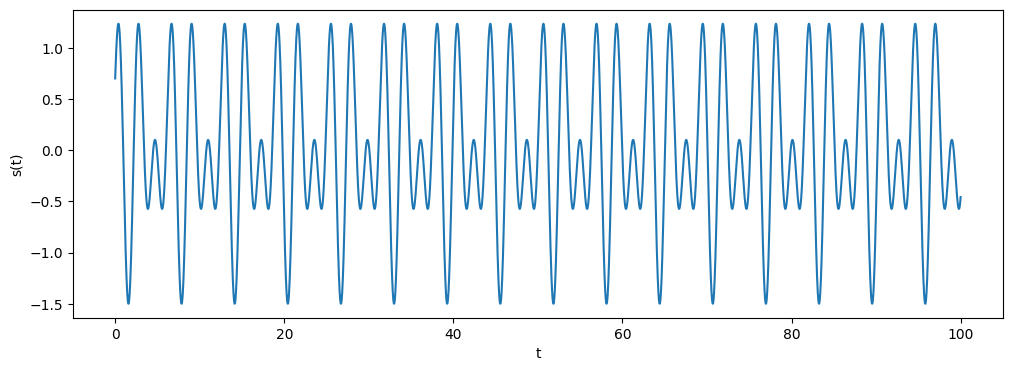

In [82]:
#Soma de cosseno e seno
s = 0.7 * np.cos(2*t) + 0.8 * np.sin(3*t)

plt.figure(figsize=(12, 4))
plt.xlabel('t')
plt.ylabel('s(t)')
plt.plot(t, s)
plt.show()

In [83]:
z = np.fft.fft(s)
z[0] = 0
z[5000:10000] = np.zeros(5000)

w = np.fft.ifft(z) / np.size(t)

amp = 2 * np.abs(w)

fase = np.arctan2(np.imag(w), np.real(w))
unwrapped_phase = np.unwrap(fase)

In [84]:
sinal_hilbert = hilbert(s)
fase_hilbert = np.angle(sinal_hilbert)
unwrapped_phase_hilbert = np.unwrap(fase_hilbert)

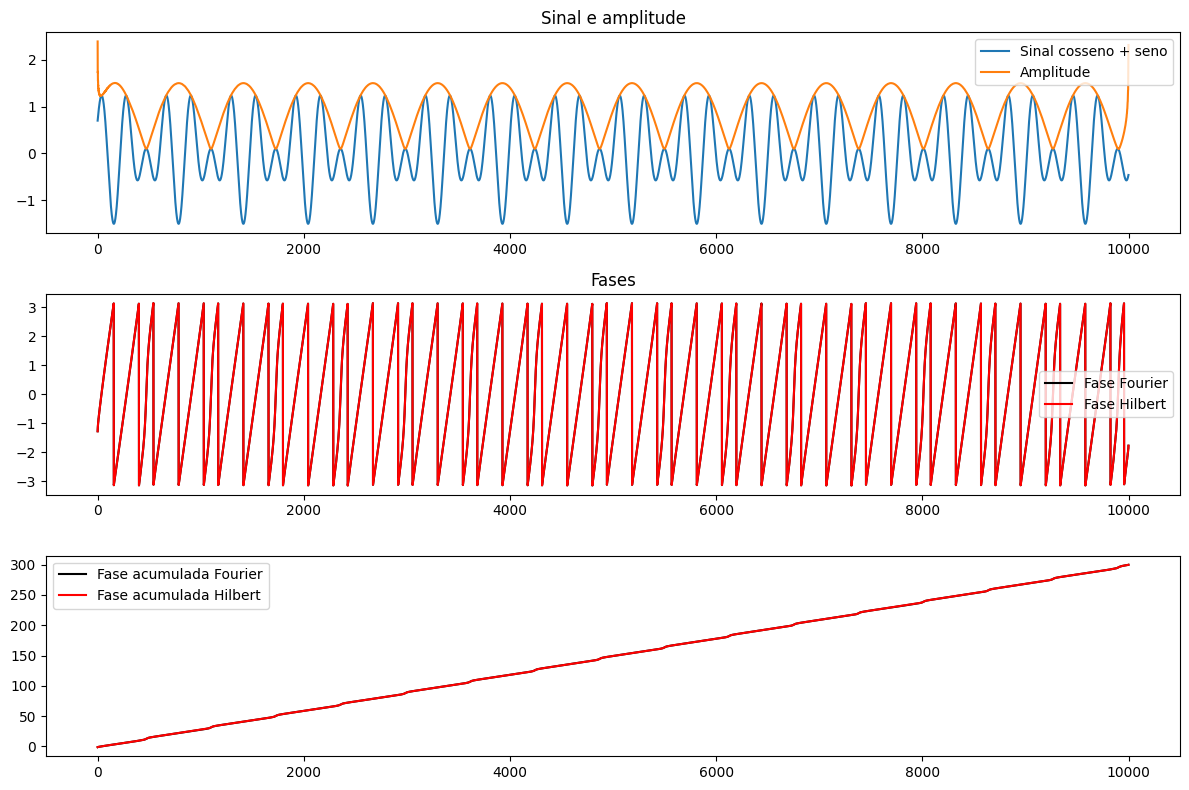

In [85]:
fig, ax = plt.subplots(3,1, figsize=(12,8))

ax[0].plot(s, label='Sinal cosseno + seno')
#ax[0].plot(sinal_hilbert, label='Sinal Hilbert', color='red')
ax[0].plot(10000*amp, label='Amplitude')
ax[0].legend(loc='upper right')
ax[0].set_title('Sinal e amplitude')

ax[1].plot(fase, color='black', label='Fase Fourier')
ax[1].plot(fase_hilbert, color='red', label='Fase Hilbert')
ax[1].set_title('Fases')
ax[1].legend()

ax[2].plot(unwrapped_phase, color='black', label='Fase acumulada Fourier')
ax[2].plot(unwrapped_phase_hilbert, color='red', label='Fase acumulada Hilbert')
ax[2].legend()

plt.tight_layout()

#se sobrepoem graficamente mas há uma leve diferença nos valores

# Exemplo 5.0.3.

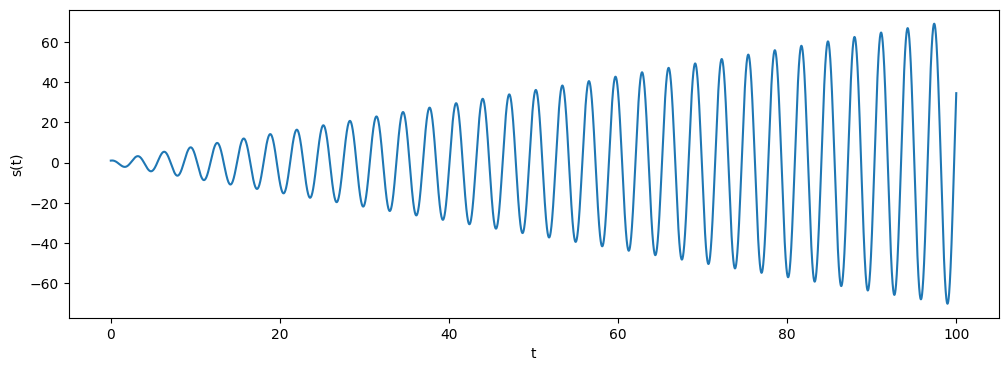

In [86]:
s = (1 + 0.7*t) * np.cos(2*t)

plt.figure(figsize=(12, 4))
plt.xlabel('t')
plt.ylabel('s(t)')
plt.plot(t, s)
plt.show()

In [87]:
z = np.fft.fft(s)
z[0] = 0
z[5000:10000] = np.zeros(5000)

w = np.fft.ifft(z) / np.size(t)

amp = 2*np.abs(w)

fase = np.arctan2(np.imag(w), np.real(w))
unwrapped_phase = np.unwrap(fase)

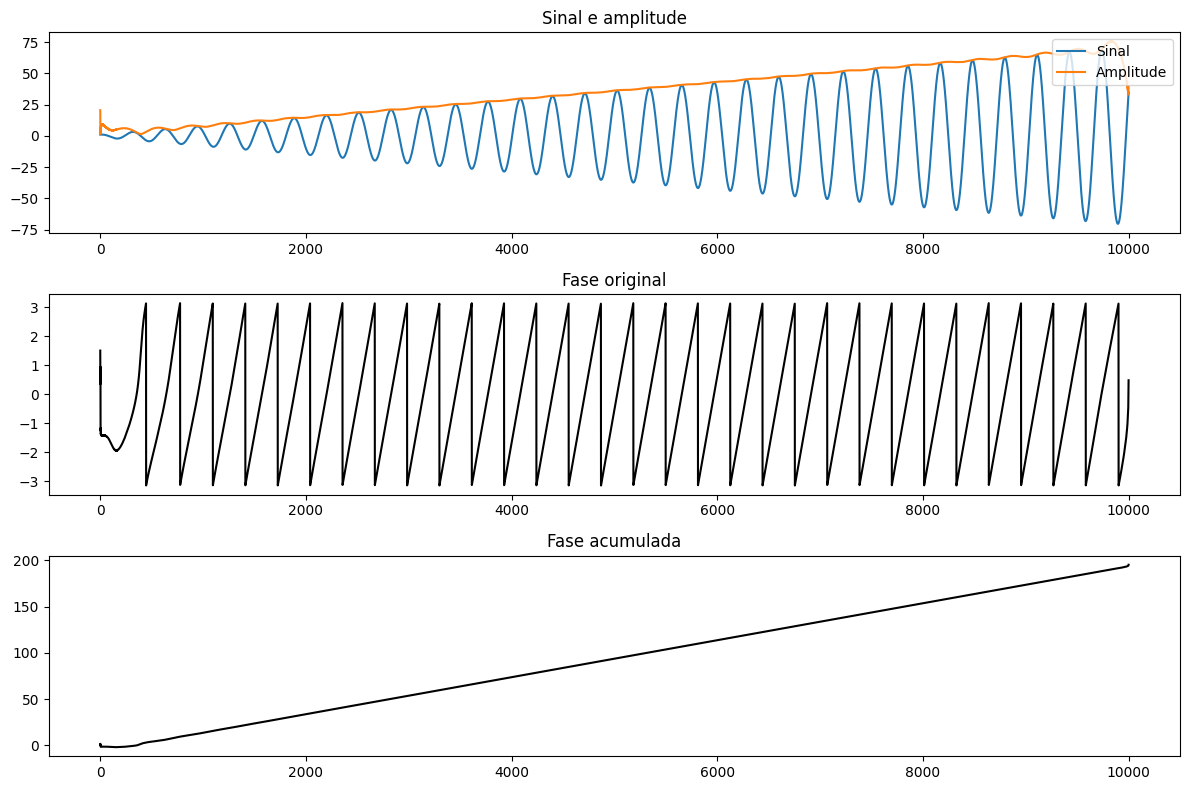

In [88]:
fig, ax = plt.subplots(3,1, figsize=(12,8))

ax[0].plot(s, label='Sinal')
ax[0].plot(10000*amp, label='Amplitude')
ax[0].legend(loc='upper right')
ax[0].set_title('Sinal e amplitude')

ax[1].plot(fase, color='black')
ax[1].set_title('Fase original')

ax[2].plot(unwrapped_phase, color='black')
ax[2].set_title('Fase acumulada')

plt.tight_layout()

# Aplicando à série de soja

In [89]:
'''from yahoofinancials import YahooFinancials
import pandas as pd
from datetime import datetime

inicio = datetime.strptime('2000-01-01', r"%Y-%m-%d")
fim = datetime.strptime('2024-01-29', r"%Y-%m-%d")
inicio = inicio.strftime(r"%Y-%m-%d")
fim = fim.strftime(r"%Y-%m-%d")
#inicio = datetime.fromisoformat(inicio)
#fim = datetime.fromisoformat(fim)'''

'from yahoofinancials import YahooFinancials\nimport pandas as pd\nfrom datetime import datetime\n\ninicio = datetime.strptime(\'2000-01-01\', r"%Y-%m-%d")\nfim = datetime.strptime(\'2024-01-29\', r"%Y-%m-%d")\ninicio = inicio.strftime(r"%Y-%m-%d")\nfim = fim.strftime(r"%Y-%m-%d")\n#inicio = datetime.fromisoformat(inicio)\n#fim = datetime.fromisoformat(fim)'

In [90]:
'''lista_codigos = ['ZS=F']  #soja grão
dados_yahoo = YahooFinancials(lista_codigos)
preco_diario = dados_yahoo.get_historical_price_data(inicio, fim, 'daily')
precos_soja = pd.DataFrame({a: {x['formatted_date']: x['adjclose'] for x in preco_diario[a]['prices']} for a in lista_codigos})

# Pré-processamento
precos_soja.reset_index(inplace=True)
precos_soja = precos_soja.rename(columns={'index':'Data'}).copy()
precos_soja.set_index('Data', inplace=True)
precos_soja.index = pd.to_datetime(precos_soja.index)

precos_soja = precos_soja.dropna()'''

"lista_codigos = ['ZS=F']  #soja grão\ndados_yahoo = YahooFinancials(lista_codigos)\npreco_diario = dados_yahoo.get_historical_price_data(inicio, fim, 'daily')\nprecos_soja = pd.DataFrame({a: {x['formatted_date']: x['adjclose'] for x in preco_diario[a]['prices']} for a in lista_codigos})\n\n# Pré-processamento\nprecos_soja.reset_index(inplace=True)\nprecos_soja = precos_soja.rename(columns={'index':'Data'}).copy()\nprecos_soja.set_index('Data', inplace=True)\nprecos_soja.index = pd.to_datetime(precos_soja.index)\n\nprecos_soja = precos_soja.dropna()"

In [91]:
import yfinance as yf
import pandas as pd

[*********************100%%**********************]  3 of 3 completed


<Axes: xlabel='Date'>

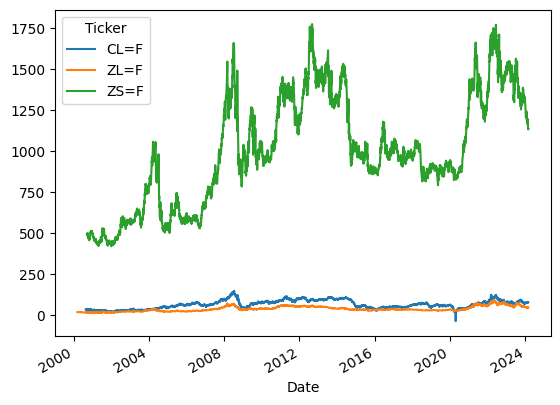

In [92]:
lista_acoes = ['ZS=F', 'ZL=F', 'CL=F']
data_inicial = '1999-01-01'
data_final = '2024-02-29'
precos_df = yf.download(lista_acoes, start=data_inicial,end=data_final)['Adj Close']
precos_df.plot()

In [93]:
precos_grao = precos_df['ZS=F']
precos_oleo = precos_df['ZL=F']
precos_grao.dropna(inplace=True)
precos_oleo.dropna(inplace=True)
precos_grao

Date
2000-09-15     493.75
2000-09-18     484.00
2000-09-19     484.25
2000-09-20     483.25
2000-09-21     486.50
               ...   
2024-02-22    1147.75
2024-02-23    1133.00
2024-02-26    1136.00
2024-02-27    1131.25
2024-02-28    1134.00
Name: ZS=F, Length: 5899, dtype: float64

In [94]:
'''soja_fft = np.fft.fft(precos_soja)

#soja_fft[0] = 0
#soja_fft[5800:10800] = np.zeros(5000)  #verificar isso
soja_ifft = np.fft.ifft(soja_fft) / precos_soja.size

amp = 2*np.abs(soja_ifft)

fase = np.arctan2(np.imag(soja_ifft), np.real(soja_ifft))
unwrapped_phase = np.unwrap(fase)'''

'soja_fft = np.fft.fft(precos_soja)\n\n#soja_fft[0] = 0\n#soja_fft[5800:10800] = np.zeros(5000)  #verificar isso\nsoja_ifft = np.fft.ifft(soja_fft) / precos_soja.size\n\namp = 2*np.abs(soja_ifft)\n\nfase = np.arctan2(np.imag(soja_ifft), np.real(soja_ifft))\nunwrapped_phase = np.unwrap(fase)'

In [107]:
# Calcular a Transformada de Fourier
n = len(precos_grao)
z = np.fft.fft(precos_grao)
freq = np.fft.fftfreq(n)

# Zerar os valores com frequência negativa (apenas para considerar a parte positiva)
z[freq < 0] = 0

# Calcular a Transformada Inversa de Fourier
w = np.fft.ifft(z)

fase = np.angle(w)

fase_acm = np.unwrap(fase)

In [112]:
sinal_hilbert = hilbert(precos_grao)
fase_hilbert = np.angle(sinal_hilbert)
unwrapped_phase_hilbert = np.unwrap(fase_hilbert)

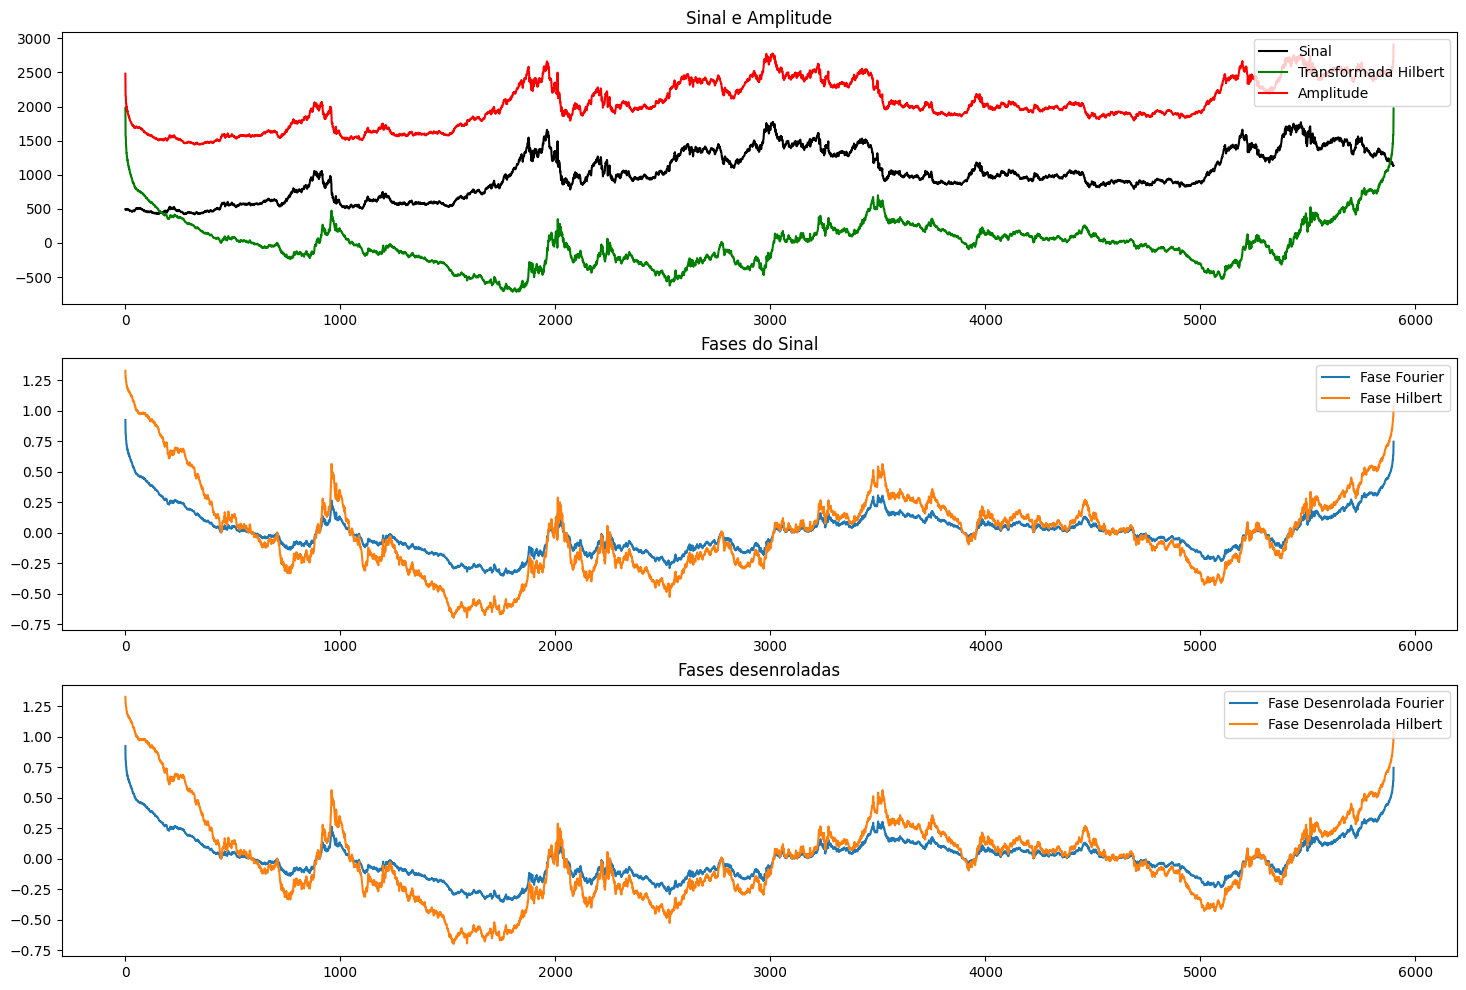

In [114]:
# Plotar os resultados
plt.figure(figsize=(18, 12))

plt.subplot(3, 1, 1)
plt.plot(range(n), precos_grao, label='Sinal', color='black')
plt.plot(range(n), sinal_hilbert.imag, label='Transformada Hilbert', color='green')
plt.plot(2*np.abs(w), label='Amplitude', color='red')
plt.title('Sinal e Amplitude')
plt.legend(loc='upper right')

plt.subplot(3, 1, 2)
plt.plot(fase, label='Fase Fourier')
plt.plot(fase_hilbert, label='Fase Hilbert')
plt.title('Fases do Sinal')
plt.legend(loc='upper right')

plt.subplot(3, 1, 3)  #não se fez necessário pois a fase original não apresenta saltos superiores a 2pi
plt.plot(fase_acm, label='Fase Desenrolada Fourier')
plt.plot(unwrapped_phase_hilbert, label='Fase Desenrolada Hilbert')
plt.title('Fases desenroladas')
plt.legend(loc='upper right')

#plt.tight_layout()
plt.show()

## Verificando a estacionariedade da série de preços do grão

In [98]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput[f"Critical Value ({key})"] = value
    print(dfoutput)


adf_test(precos_grao) #série não estacionária, p-value > 0.05

Results of Dickey-Fuller Test:
Test Statistic                   -2.320994
p-value                           0.165286
#Lags Used                       23.000000
Number of Observations Used    5875.000000
Critical Value (1%)              -3.431464
Critical Value (5%)              -2.862032
Critical Value (10%)             -2.567032
dtype: float64


## Verificando estacionariedade dos retornos

<Axes: xlabel='Date'>

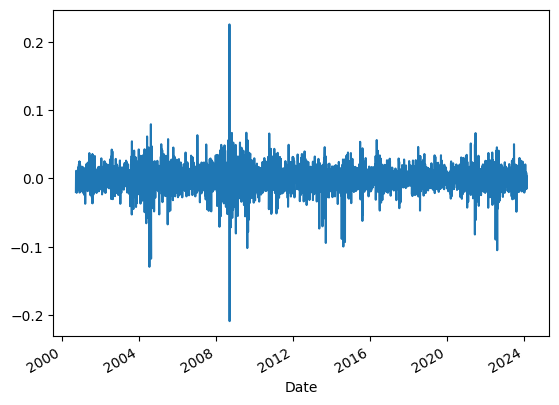

In [100]:
retornos_df = precos_grao.pct_change()
retornos_df.plot()

In [101]:
retornos_df.dropna(inplace=True)

In [102]:
adf_test(retornos_df)   #série estacionária, p-value < 0.05

Results of Dickey-Fuller Test:
Test Statistic                  -24.712866
p-value                           0.000000
#Lags Used                        8.000000
Number of Observations Used    5889.000000
Critical Value (1%)              -3.431461
Critical Value (5%)              -2.862031
Critical Value (10%)             -2.567031
dtype: float64


O valor do investimento em um dado período $T$ vai ser igual a

$P_T = P_0\prod_{t=1}^T(1+R_t) = P_0(1+R_1)\times(1+R_2)\times...\times(1+R_T)$

sendo $P_0$ o valor inicial.

<Axes: xlabel='Date'>

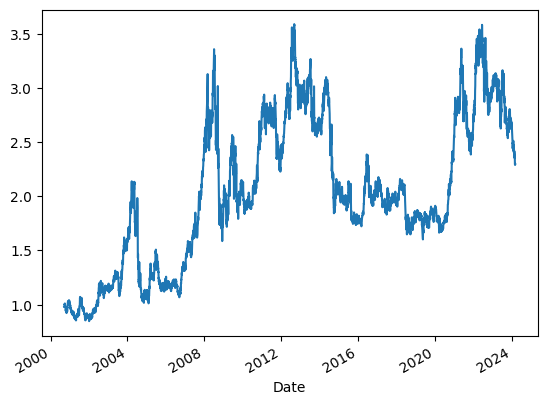

In [103]:
ret_acm = (1+retornos_df).cumprod()   #retornos acumulados
ret_acm.plot()

In [104]:
adf_test(ret_acm)    #série não estacionária, p-value > 0.05

Results of Dickey-Fuller Test:
Test Statistic                   -2.321923
p-value                           0.164995
#Lags Used                       23.000000
Number of Observations Used    5874.000000
Critical Value (1%)              -3.431464
Critical Value (5%)              -2.862032
Critical Value (10%)             -2.567032
dtype: float64


# Fases do retorno simples

In [105]:
'''ret_fft = np.fft.fft(retornos_df)

ret_fft[0] = 0
ret_ifft = np.fft.ifft(ret_fft) / retornos_df.size

amp = 2*np.abs(ret_ifft)

fase = np.arctan2(np.imag(ret_ifft), np.real(ret_ifft))
unwrapped_phase = np.unwrap(fase)                 #np.unwrap(fase)'''

In [120]:
# Calcular a Transformada de Fourier
n = len(retornos_df)
z = np.fft.fft(retornos_df)
freq = np.fft.fftfreq(n)

# Zerar os valores com frequência negativa (apenas para considerar a parte positiva)
z[freq < 0] = 0

# Calcular a Transformada Inversa de Fourier
w = np.fft.ifft(z)

fase = np.angle(w)

fase_acm = np.unwrap(fase)

In [121]:
sinal_hilbert = hilbert(retornos_df)
fase_hilbert = np.angle(sinal_hilbert)
unwrapped_phase_hilbert = np.unwrap(fase_hilbert)

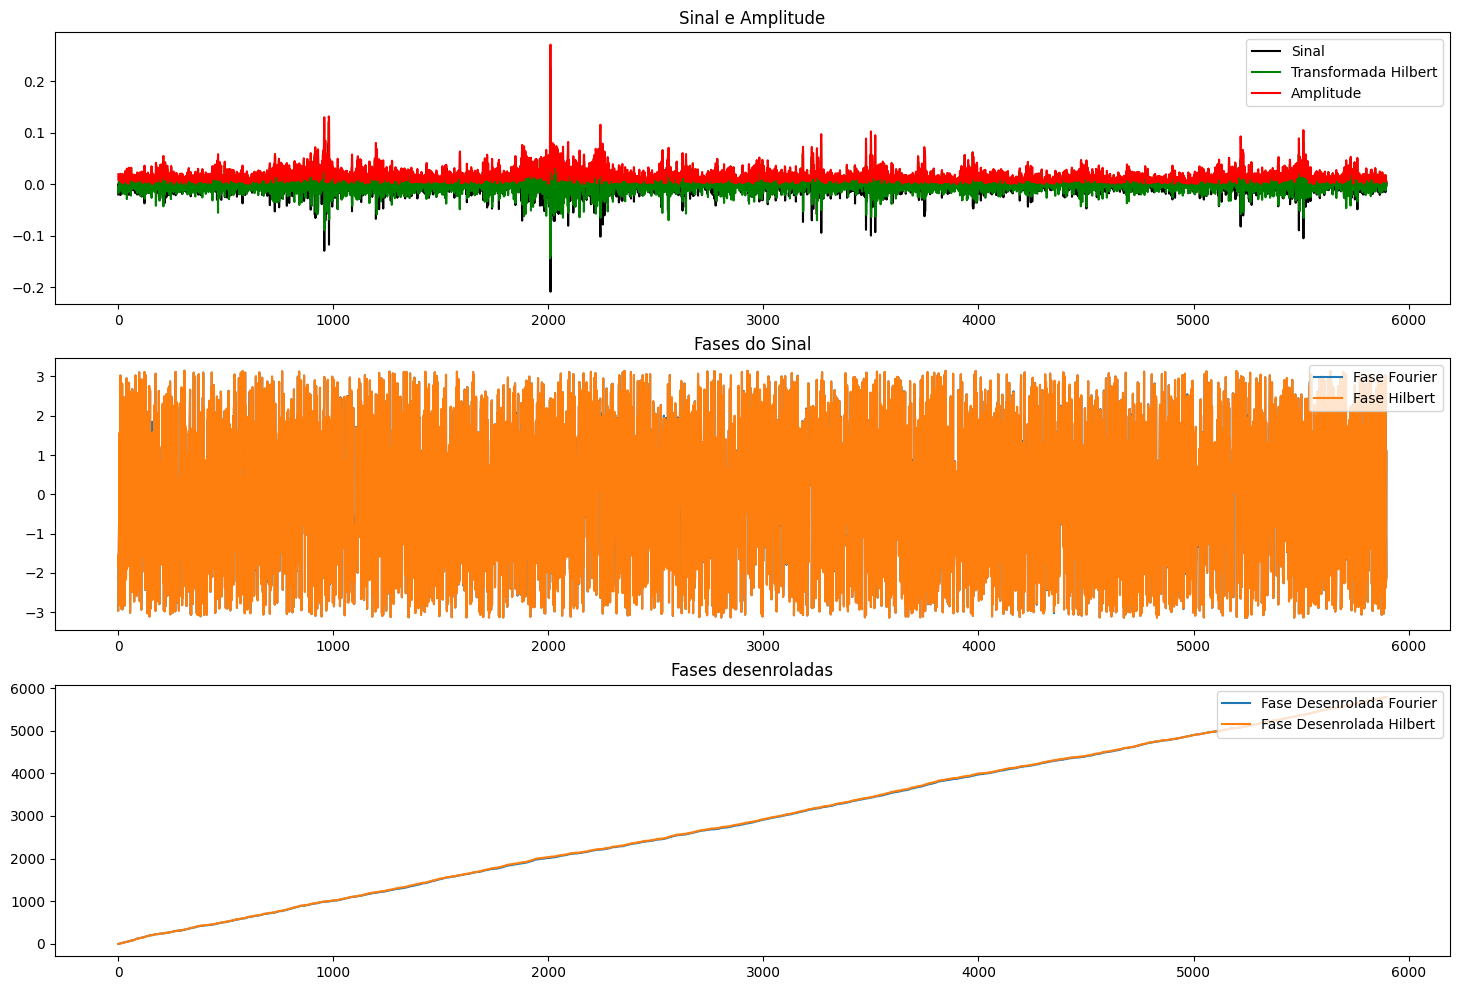

In [122]:
# Plotar os resultados
plt.figure(figsize=(18, 12))

plt.subplot(3, 1, 1)
plt.plot(range(n), retornos_df, label='Sinal', color='black')
plt.plot(range(n), sinal_hilbert.imag, label='Transformada Hilbert', color='green')
plt.plot(2*np.abs(w), label='Amplitude', color='red')
plt.title('Sinal e Amplitude')
plt.legend(loc='upper right')

plt.subplot(3, 1, 2)
plt.plot(fase, label='Fase Fourier')
plt.plot(fase_hilbert, label='Fase Hilbert')
plt.title('Fases do Sinal')
plt.legend(loc='upper right')

plt.subplot(3, 1, 3)  #se fez necessário pois a fase original apresenta saltos superiores a 2pi
plt.plot(fase_acm, label='Fase Desenrolada Fourier')
plt.plot(unwrapped_phase_hilbert, label='Fase Desenrolada Hilbert')
plt.title('Fases desenroladas')
plt.legend(loc='upper right')

#plt.tight_layout()
plt.show()

## Análise do óleo de soja

In [115]:
# Calcular a Transformada de Fourier
n = len(precos_oleo)
z = np.fft.fft(precos_oleo)
freq = np.fft.fftfreq(n)

# Zerar os valores com frequência negativa (apenas para considerar a parte positiva)
z[freq < 0] = 0

# Calcular a Transformada Inversa de Fourier
w = np.fft.ifft(z)

fase = np.angle(w)

fase_acm = np.unwrap(fase)

In [116]:
sinal_hilbert = hilbert(precos_oleo)
fase_hilbert = np.angle(sinal_hilbert)
unwrapped_phase_hilbert = np.unwrap(fase_hilbert)

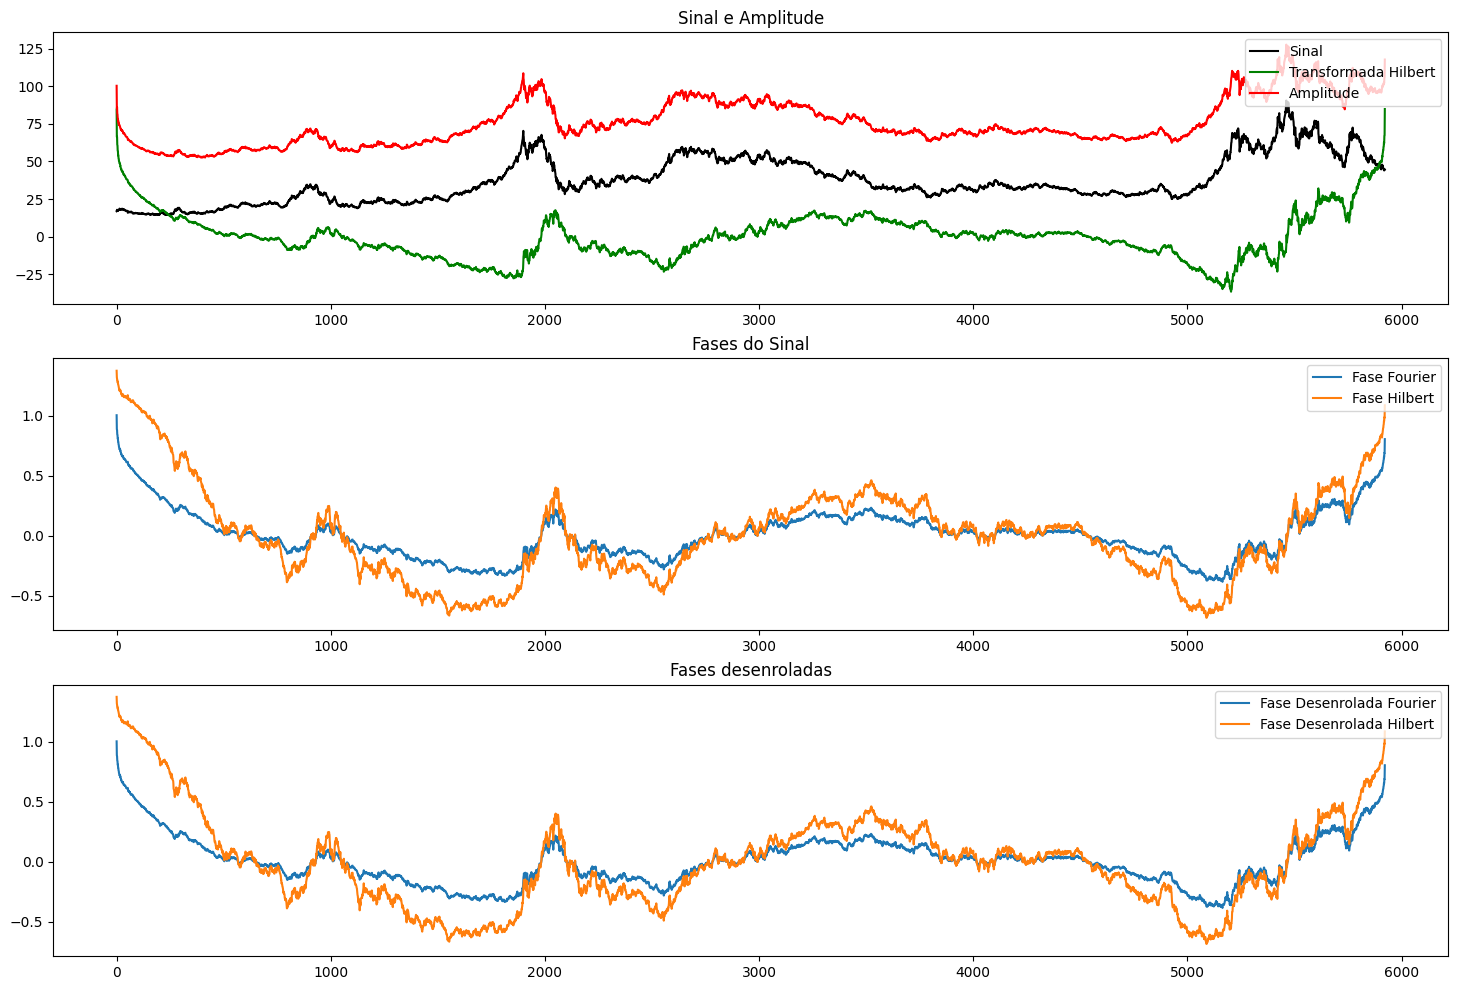

In [117]:
# Plotar os resultados
plt.figure(figsize=(18, 12))

plt.subplot(3, 1, 1)
plt.plot(range(n), precos_oleo, label='Sinal', color='black')
plt.plot(range(n), sinal_hilbert.imag, label='Transformada Hilbert', color='green')
plt.plot(2*np.abs(w), label='Amplitude', color='red')
plt.title('Sinal e Amplitude')
plt.legend(loc='upper right')

plt.subplot(3, 1, 2)
plt.plot(fase, label='Fase Fourier')
plt.plot(fase_hilbert, label='Fase Hilbert')
plt.title('Fases do Sinal')
plt.legend(loc='upper right')

plt.subplot(3, 1, 3)  #não se fez necessário pois a fase original não apresenta saltos superiores a 2pi
plt.plot(fase_acm, label='Fase Desenrolada Fourier')
plt.plot(unwrapped_phase_hilbert, label='Fase Desenrolada Hilbert')
plt.title('Fases desenroladas')
plt.legend(loc='upper right')

#plt.tight_layout()
plt.show()